In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('post-election-violence-data.csv')
df.drop(0, inplace=True)

In [3]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.index = df['event_date']

In [4]:
df['fatalities'] =df['fatalities'].apply(lambda num: int(num))

In [5]:
df2001 =df.loc['2001-12-31':'2001-01-01']

In [6]:
df2001.groupby(df2001['event_type'])['fatalities'].sum()

event_type
Battles                       364
Protests                        0
Riots                          64
Strategic developments          0
Violence against civilians    211
Name: fatalities, dtype: int64

Text(0, 0.5, ' ')

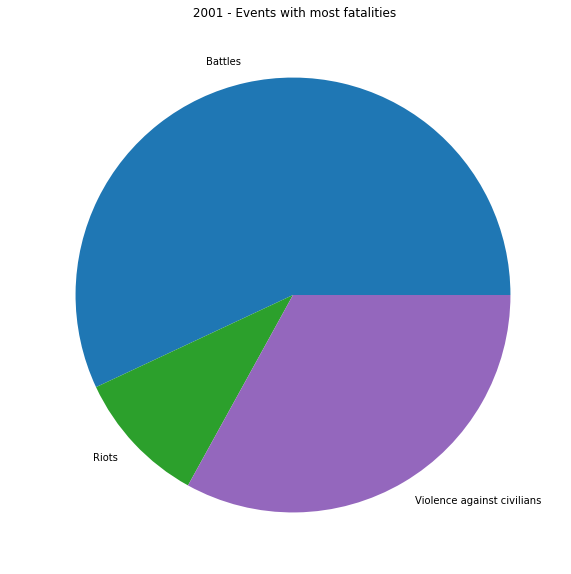

In [7]:
df2001.groupby(df2001['event_type'])['fatalities'].sum().plot(kind='pie',figsize=(14,10))
plt.title(' 2001 - Events with most fatalities')
plt.ylabel(' ')

In [8]:
df2001.groupby([df2001['event_type'], df2001['sub_event_type']])['fatalities'].sum()

event_type                  sub_event_type                    
Battles                     Armed clash                           364
Protests                    Excessive force against protesters      0
                            Peaceful protest                        0
                            Protest with intervention               0
Riots                       Mob violence                           63
                            Violent demonstration                   1
Strategic developments      Arrests                                 0
                            Change to group/activity                0
                            Looting/property destruction            0
Violence against civilians  Abduction/forced disappearance          0
                            Attack                                211
                            Sexual violence                         0
Name: fatalities, dtype: int64

Text(0, 0.5, ' ')

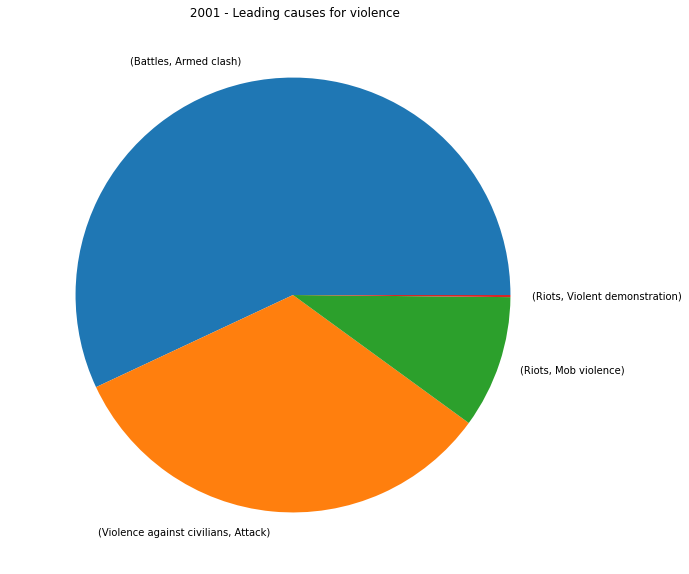

In [9]:
df2001.groupby([df2001['event_type'], df2001['sub_event_type']])['fatalities'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(14,10))
plt.title(' 2001 - Leading causes for violence')
plt.ylabel(' ')

Text(0.5, 0, 'Number of fatalities')

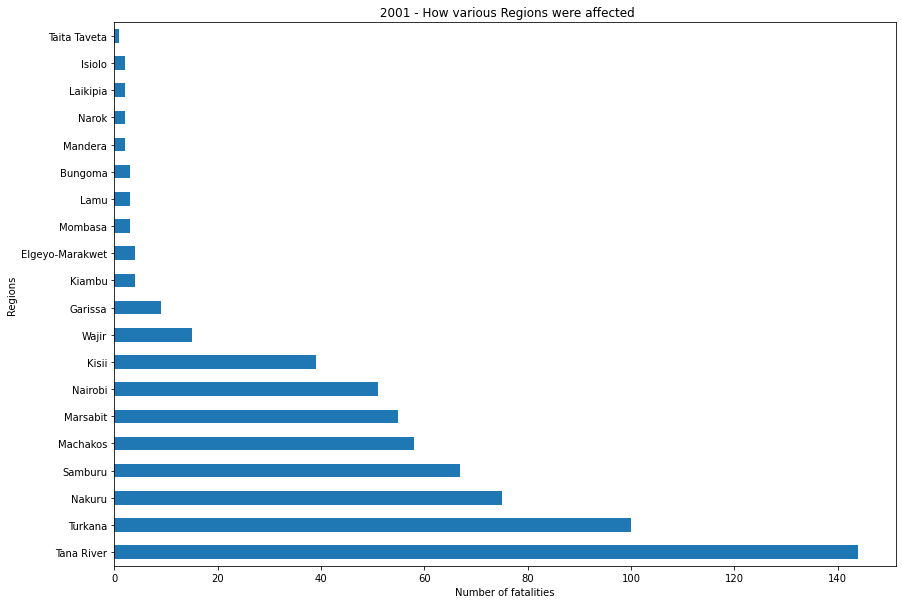

In [10]:
df2001.groupby(df2001['admin1'])['fatalities'].sum().sort_values(ascending=False)[:20].plot(kind='barh', figsize=(14,10))
plt.title(' 2001 - How various Regions were affected')
plt.ylabel('Regions')
plt.xlabel('Number of fatalities')

In [13]:
regions = df2001.groupby([df2001['admin1'],df2001['sub_event_type']])['fatalities'].sum()


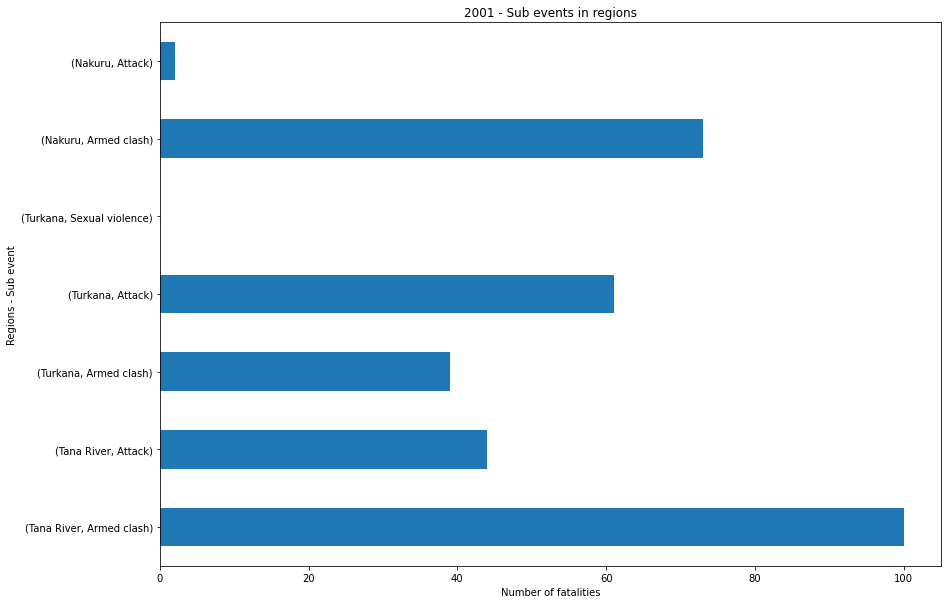

In [14]:
regions[['Tana River', 'Turkana', 'Nakuru']].plot(kind='barh', figsize=(14,10))
plt.title('2001 - Sub events in regions')
plt.ylabel('Regions - Sub event')
plt.xlabel('Number of fatalities')
#Saving files
plt.savefig('2001 - Sub events in regions.jpg', dpi=500,  bbox_inches='tight')